In [2]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

print(1+2)


3


In [3]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('/Users/Shubham/Documents/Project Stock predictions/data/pickled_ten_year_filtered_data.pkl')

In [4]:
df_stocks

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


In [5]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [6]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [7]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_stocks

,prices,articles
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
2007-01-06,12406,A Status Quo Secretary General. Best Buy and ...
2007-01-07,12414,THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08,12423,VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09,12416,The Claim: Hot Leftovers Should Cool at Room...
2007-01-10,12442,"Love Among the Ruins. Dell Says Plant a Tree,..."


In [9]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
2007-01-06,12406
2007-01-07,12414
2007-01-08,12423
2007-01-09,12416
2007-01-10,12442


In [10]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [11]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii','ignore')
        sentence=sentence.decode('unicode-escape')
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future re

In [13]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
# ss = sid.polarity_scores(sentence)
# ss

In [163]:
# Checking date for empty strings
# for date, row in df_stocks.T.iteritems():
#     if type(df_stocks.loc[date, 'articles']).__name__ == 'str':
#         print date

In [15]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8335,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.734,0.067
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
2007-01-06,12406,-0.965,0.134,0.771,0.094
2007-01-07,12414,-0.9974,0.19,0.739,0.071
2007-01-08,12423,0.939,0.096,0.792,0.112
2007-01-09,12416,-0.9952,0.104,0.845,0.051
2007-01-10,12442,-0.9534,0.134,0.743,0.123


In [16]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [17]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [22]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [18]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [19]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
print(rf.feature_importances_)

[0.55449342 0.44550658]


In [23]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [24]:
prediction

array([11937.9       ,  9608.1       , 14840.5       , 12931.7       ,
       11713.9       , 11776.2       , 11791.85      , 14068.5       ,
       13431.75      , 12770.5       , 13501.        , 11640.38333333,
       14570.7       , 12072.8       , 12334.175     , 12553.1       ,
       14120.175     , 12752.96666667, 15230.4       , 14564.9       ,
       11779.2       , 11500.2       , 14304.46666667, 13407.7       ,
       16622.65      , 13279.3       , 12824.5       , 12659.11666667,
       12635.71666667, 14415.76166667, 15195.7       , 10602.13333333,
        9801.4       , 10697.66      , 11044.        , 13433.8       ,
       11457.3       , 11665.6       , 13963.9       , 14238.54      ,
       11956.01666667, 14045.55      , 14396.45      , 11625.275     ,
       13298.8       , 14132.5       , 13086.73333333, 10801.2       ,
       12497.8       , 10687.38333333, 15275.94166667, 17165.2       ,
       11823.        , 11348.05      , 14537.63333333, 10883.31666667,
      

In [25]:
contributions

array([[ -289.13651152,  -350.18744467],
       [-1512.09855976, -1457.02539644],
       [ 1620.16862853,   643.10741527],
       ...,
       [-1066.80320922,  -614.02074697],
       [ 1460.16369914,   405.31234466],
       [  -44.24020881,  1439.41625261]])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [28]:
predictions_df

,prices
2015-01-01,11937.900000
2015-01-02,9608.100000
2015-01-03,14840.500000
2015-01-04,12931.700000
2015-01-05,11713.900000
2015-01-06,11776.200000
2015-01-07,11791.850000
2015-01-08,14068.500000
2015-01-09,13431.750000
2015-01-10,12770.500000


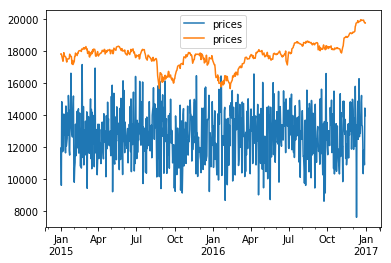

In [30]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("random forest without smoothing.png")

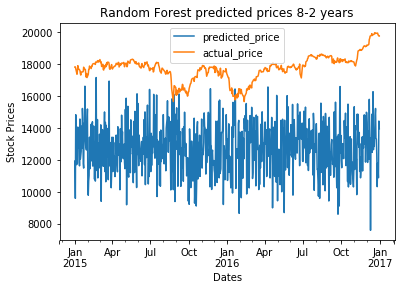

In [31]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

In [32]:
test

,prices,compound,neg,neu,pos
2015-01-01,17828,-0.8744,0.134,0.737,0.129
2015-01-02,17832,-0.9667,0.145,0.76,0.095
2015-01-03,17722,-0.9621,0.125,0.788,0.088
2015-01-04,17612,-0.9971,0.22,0.716,0.064
2015-01-05,17501,-0.9905,0.156,0.767,0.077
2015-01-06,17371,-0.9985,0.171,0.752,0.077
2015-01-07,17584,-0.9963,0.148,0.785,0.068
2015-01-08,17907,-0.9993,0.191,0.729,0.08
2015-01-09,17737,-0.9979,0.178,0.733,0.089
2015-01-10,17705,-0.9979,0.198,0.751,0.051


# Increasing the prices by a constant value so that it represents closing price during the testing

In [36]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

17679.9
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
12487.09
5192.810000000001


In [37]:
predictions_df

,prices
2015-01-01,11937.900000
2015-01-02,9608.100000
2015-01-03,14840.500000
2015-01-04,12931.700000
2015-01-05,11713.900000
2015-01-06,11776.200000
2015-01-07,11791.850000
2015-01-08,14068.500000
2015-01-09,13431.750000
2015-01-10,12770.500000


In [38]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,17130.710000
2015-01-02,14800.910000
2015-01-03,20033.310000
2015-01-04,18124.510000
2015-01-05,16906.710000
2015-01-06,16969.010000
2015-01-07,16984.660000
2015-01-08,19261.310000
2015-01-09,18624.560000
2015-01-10,17963.310000


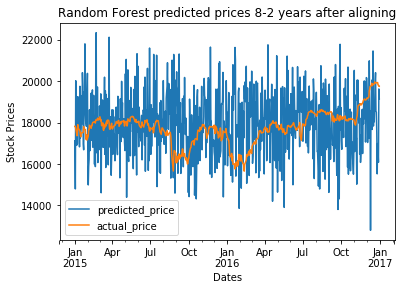

In [40]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest with aligning.png")



# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [41]:
predictions_df

,prices
2015-01-01,17130.710000
2015-01-02,14800.910000
2015-01-03,20033.310000
2015-01-04,18124.510000
2015-01-05,16906.710000
2015-01-06,16969.010000
2015-01-07,16984.660000
2015-01-08,19261.310000
2015-01-09,18624.560000
2015-01-10,17963.310000


In [42]:
predictions_df['ewma'] = pd.ewma(predictions_df["prices"], span=60, freq="D")

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [43]:
predictions_df

,prices,ewma
2015-01-01,17130.710000,17130.710000
2015-01-02,14800.910000,15946.395000
2015-01-03,20033.310000,17354.358218
2015-01-04,18124.510000,17556.628214
2015-01-05,16906.710000,17417.837047
2015-01-06,16969.010000,17336.662715
2015-01-07,16984.660000,17281.210792
2015-01-08,19261.310000,17558.544833
2015-01-09,18624.560000,17693.386649
2015-01-10,17963.310000,17724.604402


In [44]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D")

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  


In [45]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2015-01-01,17130.710000,17130.710000,17828,17828.000000
2015-01-02,14800.910000,15946.395000,17832,17830.033333
2015-01-03,20033.310000,17354.358218,17722,17792.815295
2015-01-04,18124.510000,17556.628214,17612,17745.326592
2015-01-05,16906.710000,17417.837047,17501,17693.150223
2015-01-06,16969.010000,17336.662715,17371,17634.886512
2015-01-07,16984.660000,17281.210792,17584,17626.870225
2015-01-08,19261.310000,17558.544833,17907,17666.105392
2015-01-09,18624.560000,17693.386649,17737,17675.072954
2015-01-10,17963.310000,17724.604402,17705,17678.534141


In [46]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

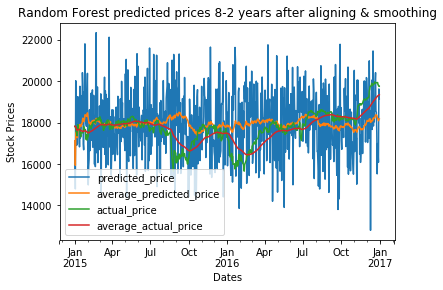

In [48]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing.png")


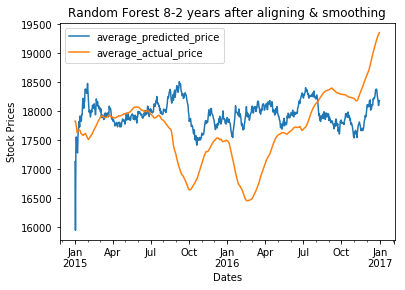

In [50]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing 2.png")

# Increasing the prices by a constant value so that it represents closing price during the testing

In [51]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

# LogisticRegression

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


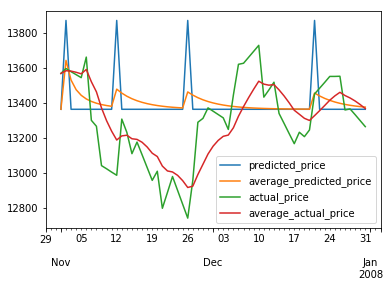

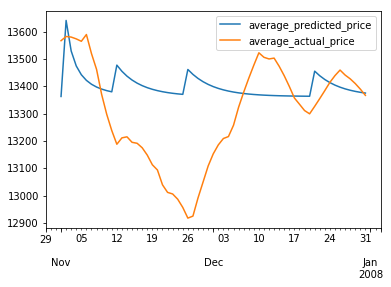

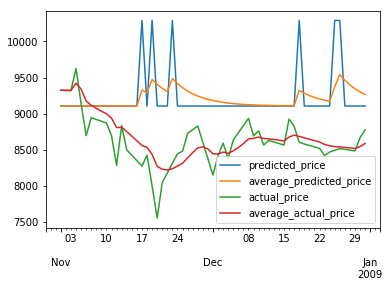

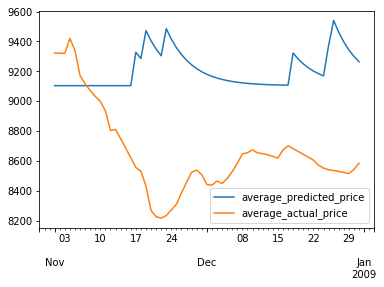

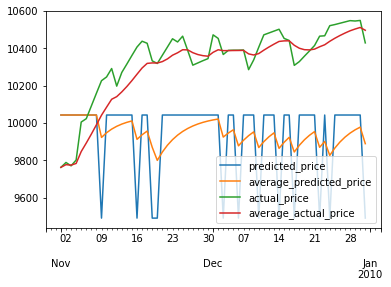

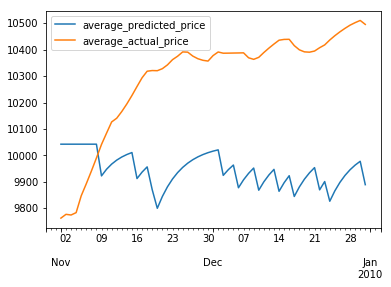

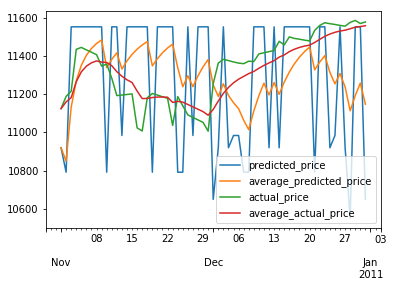

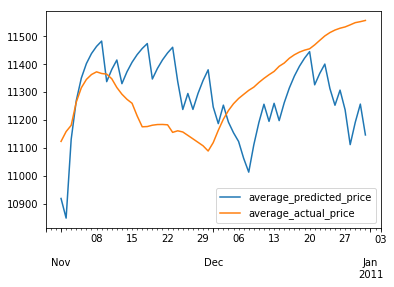

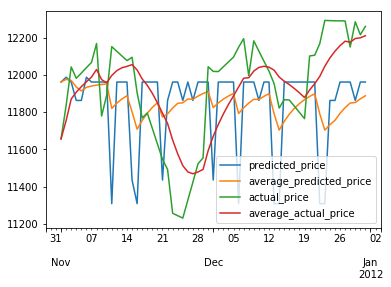

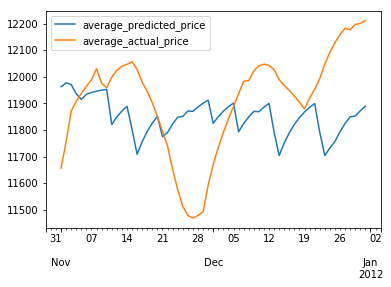

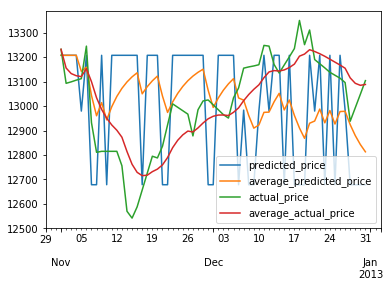

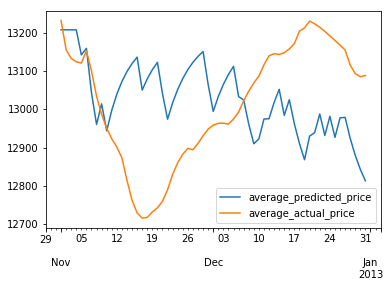

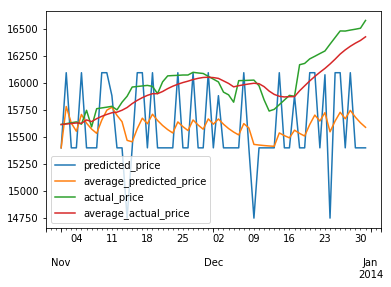

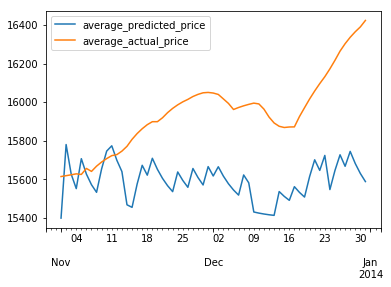

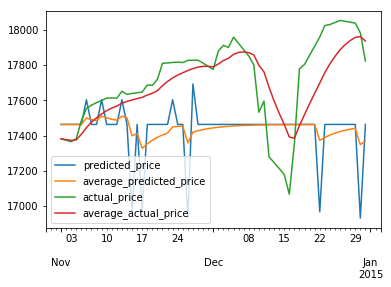

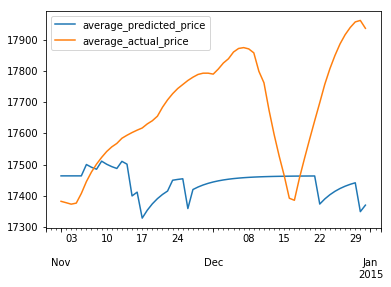

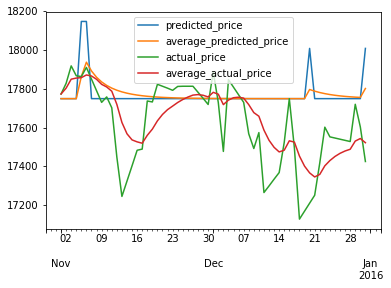

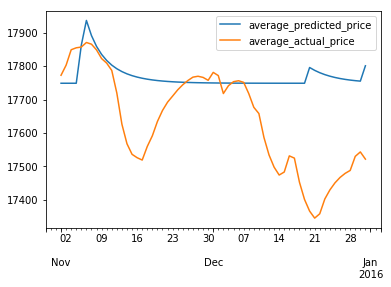

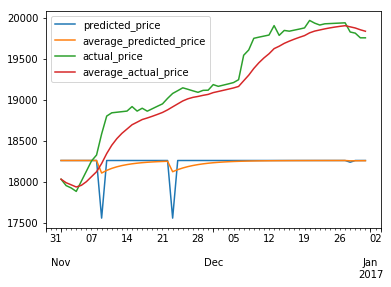

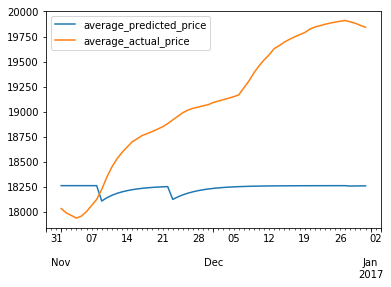

In [52]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [53]:
lr.classes_

array([15660, 15766, 15882, 15885, 15914, 15944, 15954, 15973, 15988,
       15995, 16002, 16009, 16014, 16016, 16024, 16027, 16029, 16069,
       16085, 16086, 16093, 16140, 16145, 16151, 16153, 16167, 16196,
       16204, 16336, 16346, 16363, 16379, 16381, 16391, 16398, 16413,
       16416, 16431, 16449, 16453, 16454, 16460, 16466, 16468, 16484,
       16514, 16516, 16544, 16557, 16598, 16620, 16639, 16697, 16865,
       16899, 16906, 16943, 16964, 16995, 17000, 17006, 17029, 17051,
       17073, 17140, 17148, 17158, 17213, 17217, 17218, 17223, 17227,
       17229, 17251, 17286, 17313, 17325, 17356, 17400, 17409, 17435,
       17481, 17492, 17495, 17498, 17500, 17502, 17515, 17520, 17525,
       17526, 17529, 17530, 17535, 17541, 17556, 17563, 17570, 17576,
       17582, 17593, 17602, 17603, 17609, 17616, 17623, 17633, 17640,
       17651, 17652, 17660, 17674, 17675, 17685, 17694, 17705, 17706,
       17710, 17711, 17716, 17717, 17718, 17720, 17721, 17729, 17732,
       17733, 17737,

In [55]:
lr.coef_[0]

array([ 0.85892144, -0.30694304, -1.8324945 , -0.26117828])

# RandomForestRegressor

In [56]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

SyntaxError: invalid syntax (<ipython-input-56-ad47bd639ad4>, line 43)

In [ ]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

<bound method RandomForestRegressor.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>

# MLP Classifier

C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Shubham\PycharmProjects\intelStockPrediction\venv\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


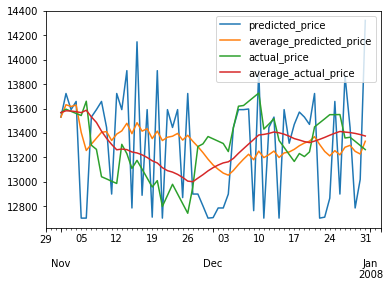

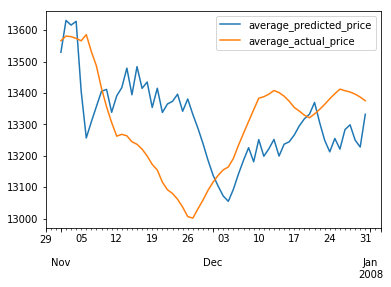

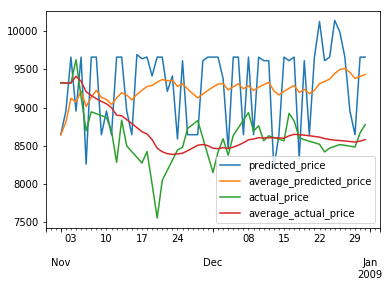

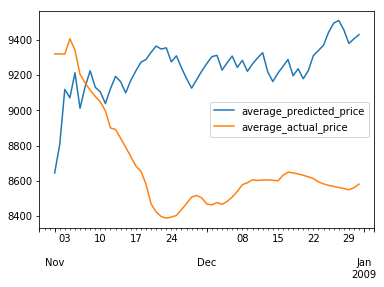

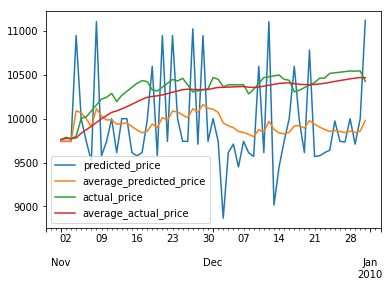

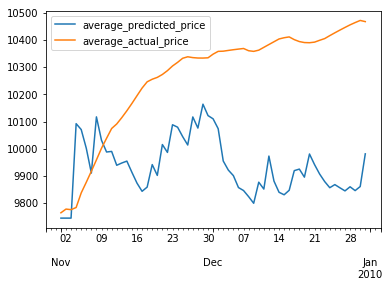

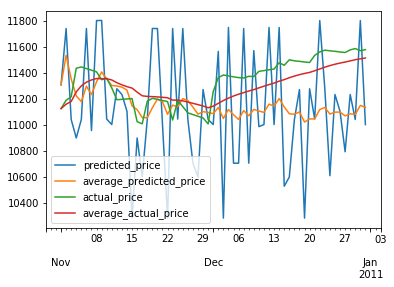

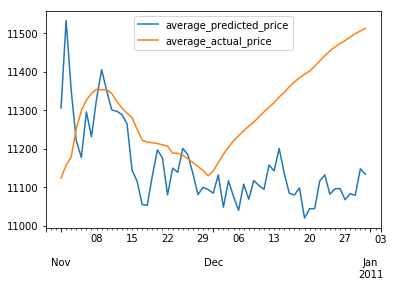

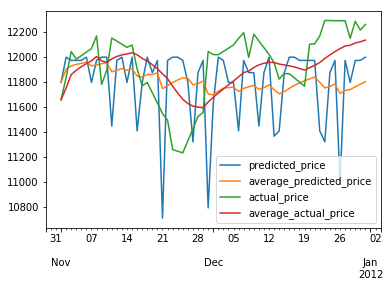

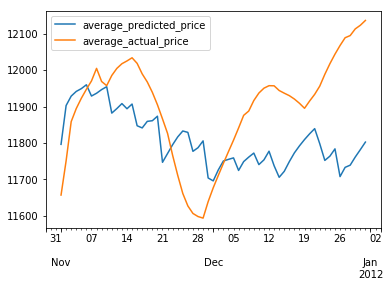

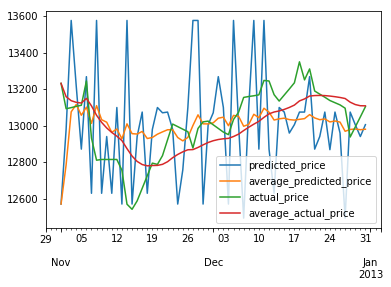

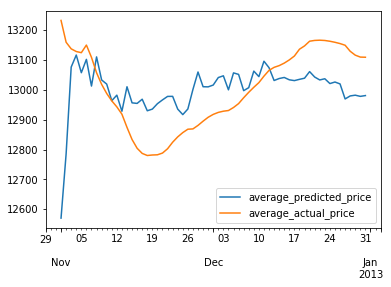

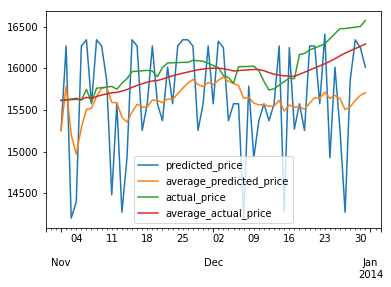

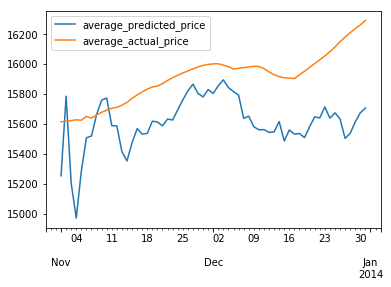

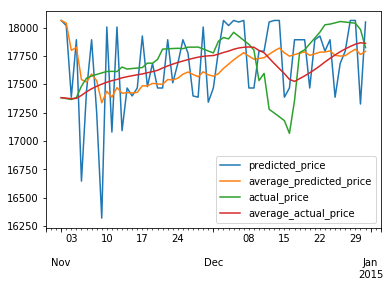

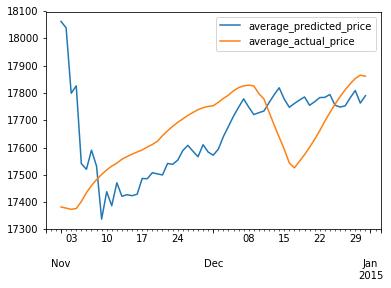

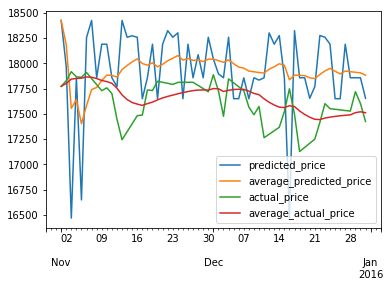

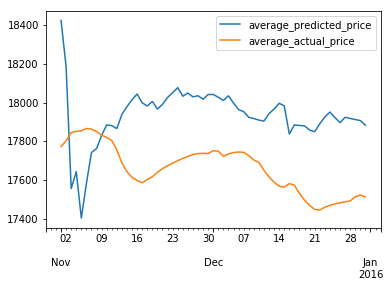

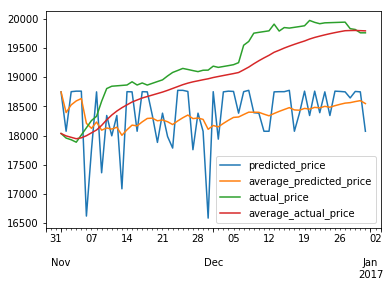

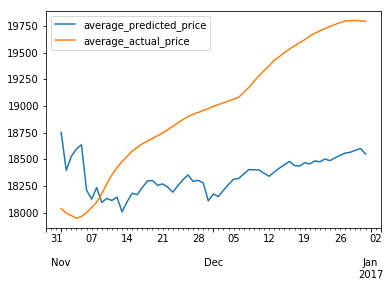

In [57]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=20, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=20, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [62]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
                     

In [65]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 4 